In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scanpy as sc

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
print('Original adata:', adata.shape)
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
adata.obs.head()

Original adata: (161764, 33538)


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4 T,CD4_TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8 T,CD8_Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8 T,CD8_Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


## L2: rbf StandardScale

In [3]:
l2_rbf_ss = pd.read_csv('SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
l2_rbf_ss.head()

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.999853,0.923636,0.753846,0.828891,0.876908,0.698158,0.833727
B_intermediate,0.994962,0.802201,0.882776,0.840467,0.939725,0.709927,0.838954
B_memory,0.997411,0.912683,0.965382,0.938136,0.981729,0.881798,0.937282
B_naive,0.990016,0.832113,0.990768,0.904514,0.990373,0.824889,0.903115
CD14_Mono,0.990511,0.969064,0.995842,0.982268,0.992221,0.966131,0.975963


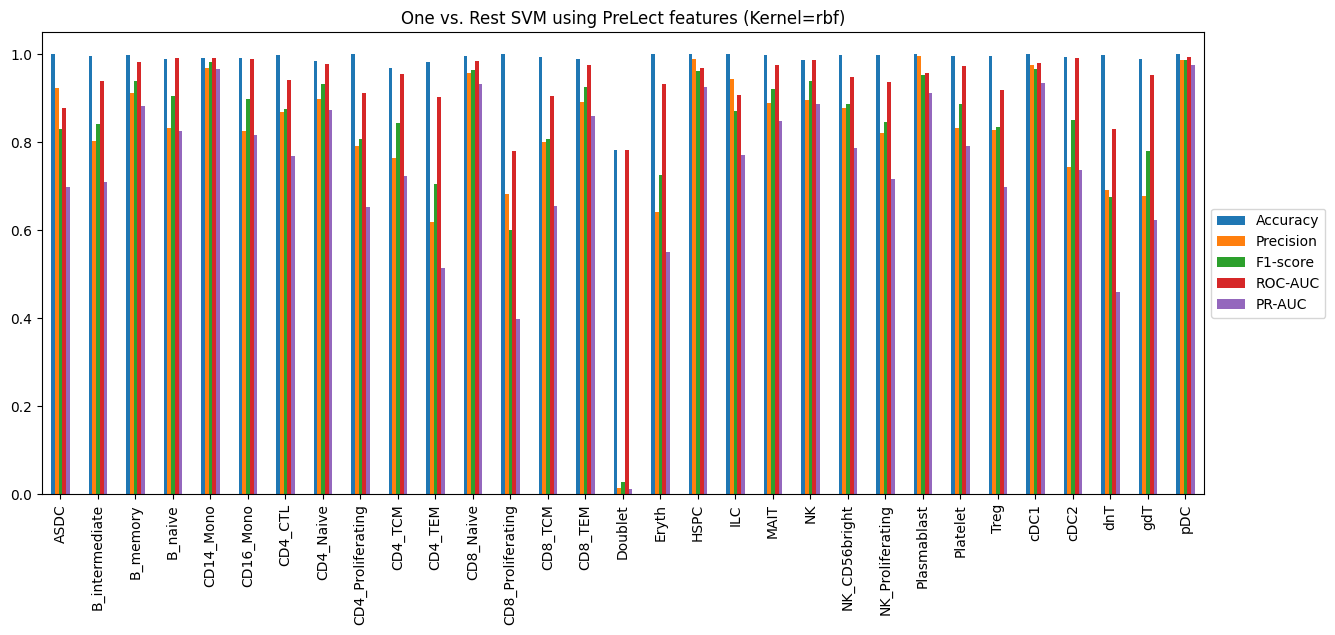

In [4]:
# All metrics
cols = ['Accuracy', 'Precision', 'F1-score', 'ROC-AUC', 'PR-AUC']
ax = l2_rbf_ss[cols].plot.bar(rot=90, figsize=(15,6), title='One vs. Rest SVM using PreLect features (Kernel=rbf)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Counts')

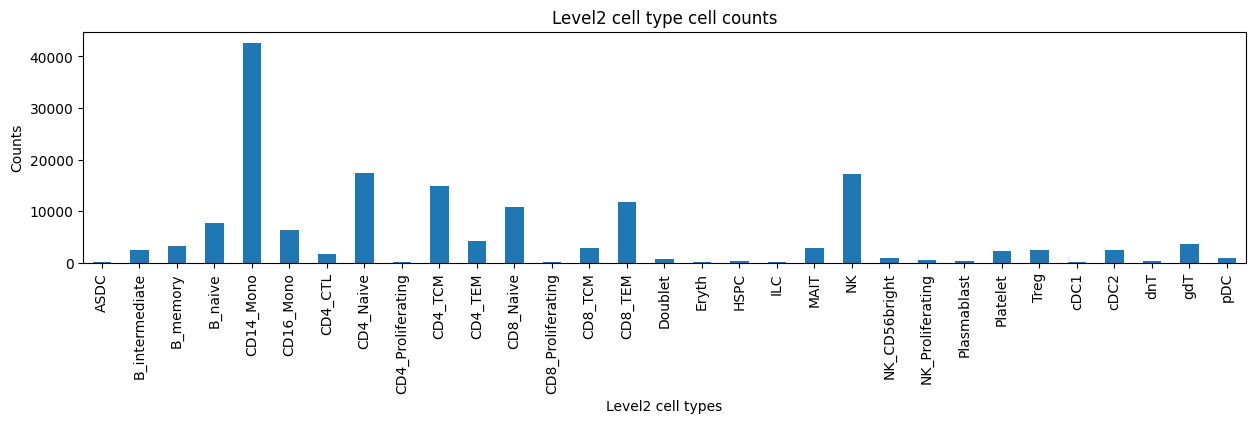

In [17]:
# cell number
adata.obs['celltype.l2'].value_counts().loc[types].plot.bar(rot=90, figsize=(15,3), title='Level2 cell type cell counts')
plt.xlabel('Level2 cell types')
plt.ylabel('Counts')

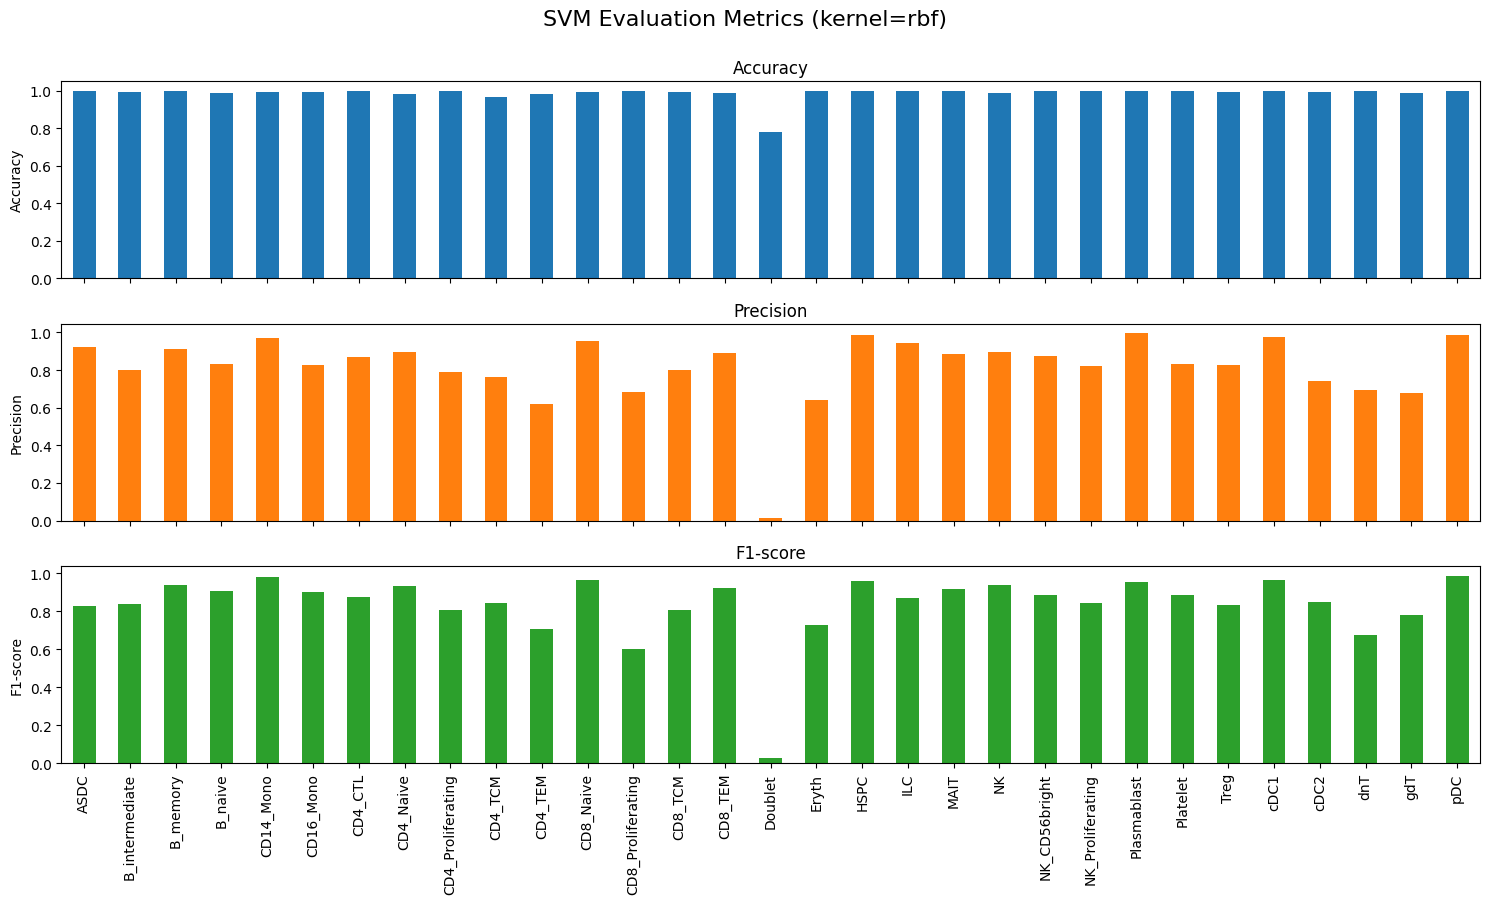

In [24]:
# accuracy
# Set up the figure for 3 vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 9))
colors = plt.cm.tab10.colors

# Plotting each metric in its own subplot as a bar plot, showing x-axis labels only on the bottom subplot
l2_rbf_ss['Accuracy'].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(labelbottom=False)

l2_rbf_ss['Precision'].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Precision')
axes[1].set_ylabel('Precision')
axes[1].tick_params(labelbottom=False)

l2_rbf_ss['F1-score'].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('F1-score')
axes[2].set_ylabel('F1-score')

# Ensure x-axis tick labels only show at the bottom subplot
axes[2].tick_params(labelbottom=True)

fig.suptitle('SVM Evaluation Metrics (kernel=rbf)', fontsize=16, y=1)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## L2: linear StandardScale

In [25]:
l2_linear_ss = pd.read_csv('SVM_metrics_linear_StandardScale_l2.csv', index_col=0)
l2_linear_ss.head()

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.999892,0.891941,0.885897,0.885767,0.942922,0.789538,0.887288
B_intermediate,0.978812,0.382469,0.517738,0.437956,0.751792,0.230774,0.433649
B_memory,0.991778,0.760455,0.868347,0.810782,0.931342,0.663996,0.808478
B_naive,0.987652,0.797667,0.993197,0.884742,0.990286,0.792576,0.884205
CD14_Mono,0.988486,0.962775,0.994847,0.978545,0.990526,0.959173,0.970926


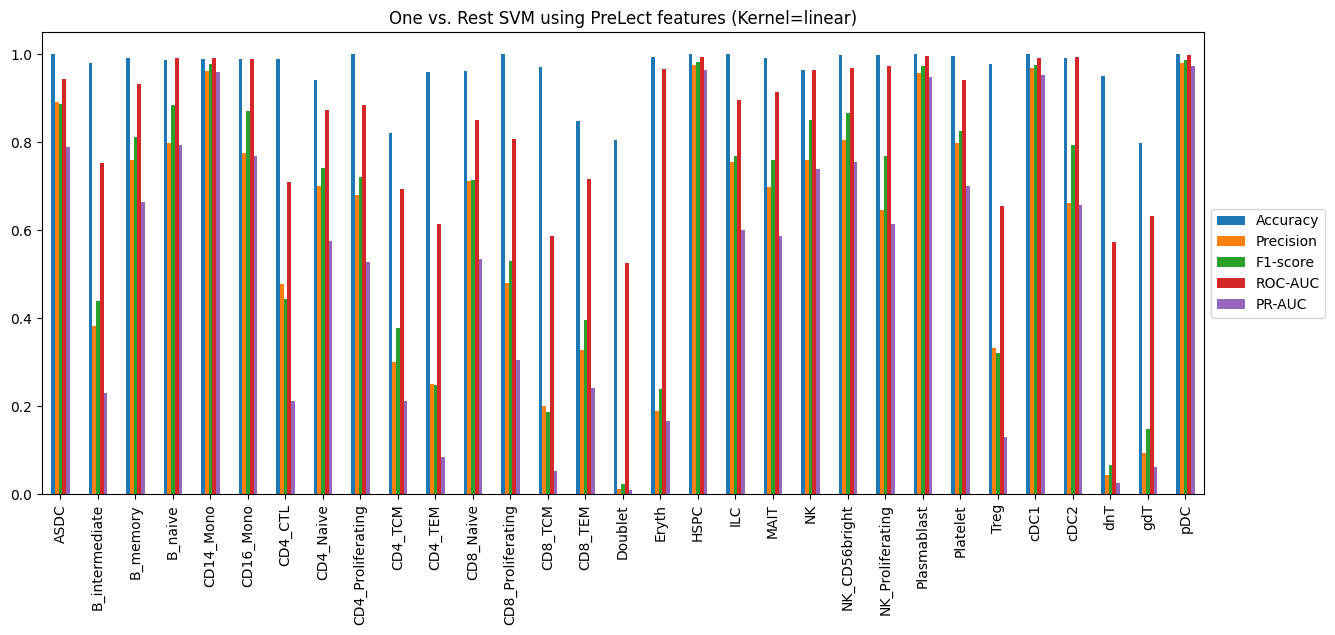

In [26]:
# All metrics
cols = ['Accuracy', 'Precision', 'F1-score', 'ROC-AUC', 'PR-AUC']
ax = l2_linear_ss[cols].plot.bar(rot=90, figsize=(15,6), title='One vs. Rest SVM using PreLect features (Kernel=linear)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

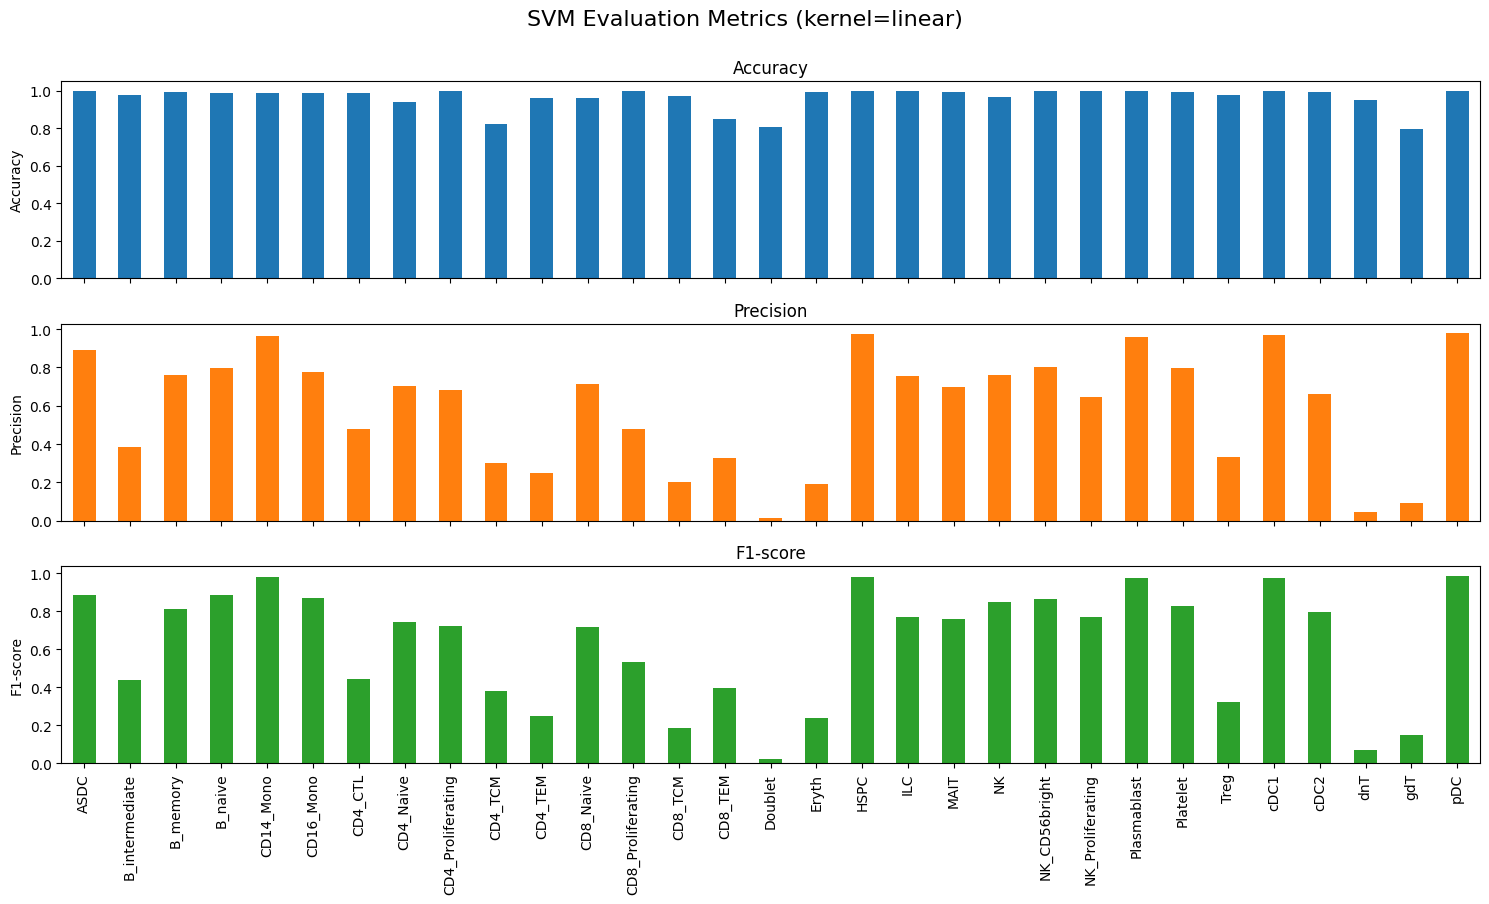

In [27]:
# accuracy
# Set up the figure for 3 vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 9))
colors = plt.cm.tab10.colors

# Plotting each metric in its own subplot as a bar plot, showing x-axis labels only on the bottom subplot
l2_linear_ss['Accuracy'].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(labelbottom=False)

l2_linear_ss['Precision'].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Precision')
axes[1].set_ylabel('Precision')
axes[1].tick_params(labelbottom=False)

l2_linear_ss['F1-score'].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('F1-score')
axes[2].set_ylabel('F1-score')

# Ensure x-axis tick labels only show at the bottom subplot
axes[2].tick_params(labelbottom=True)

fig.suptitle('SVM Evaluation Metrics (kernel=linear)', fontsize=16, y=1)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

